## Appendix 1 - Python Code and Outputs

### Data Preparation

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Data

In [3]:
import pandas as pd
titanic_training_data = pd.read_csv('train.csv')

# show first five rows of the data
titanic_training_data.head(100)
# show number of columns and rows
titanic_training_data.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


(891, 12)

#### Variable Key Guide:

| Variable name | Variable label | Variable value and value label | Variable type |
| :-: | :-: | :-: | :-: |
| PassengerID | Passenger ID | | Numerical |
| Survived | Did the passenger survive? | 0 = No, 1 = Yes | Indicator, dichotomous |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical, or ordinal |
| Name | Passenger name | | String |
| Sex | Passenger's sex | Male, Female | Categorical or indicator |
| Age | Passenger's age | | Numerical |
| Sibsp | # of siblings / spouses aboard the Titanic | | Numerical | 
| Parch | # of parents / children aboard the Titanic | | Nmerical |
| Ticket | Ticket number | | String |
| Fare | Passenger fare | | Numerical, continuous |
| Cabin | Cabin number | | Categorical |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical |

### Exploratory Data Analysis

First, we can categorize each variable as either an indicator variable, multi-category categorical variable, or numeric variable.  Then we can proceed in our exploratory data analysis by constructing the appropriate visualization for each type of variable.

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

<AxesSubplot:title={'center':'Pclass'}>

<AxesSubplot:title={'center':'Embarked'}>

<AxesSubplot:title={'center':'Cabin'}>

<AxesSubplot:title={'center':'Sex'}>

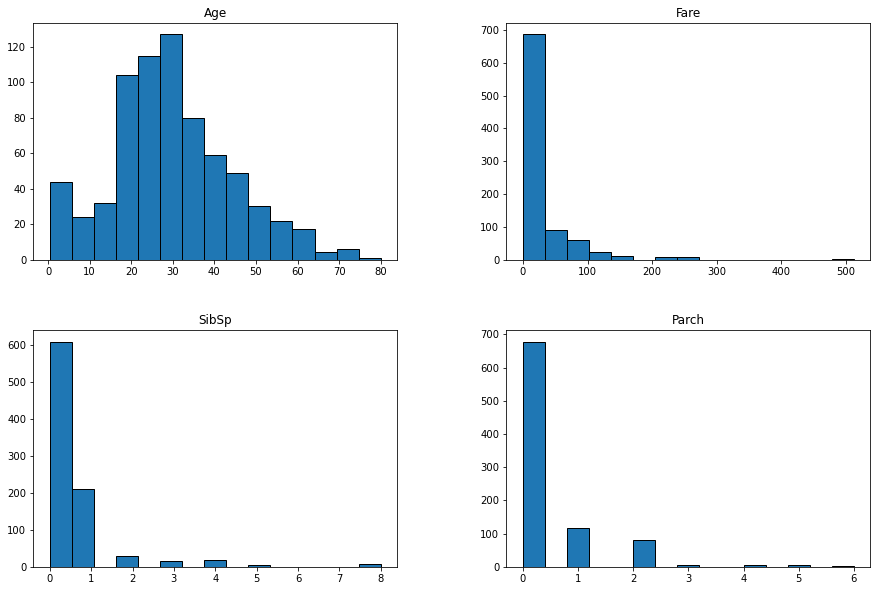

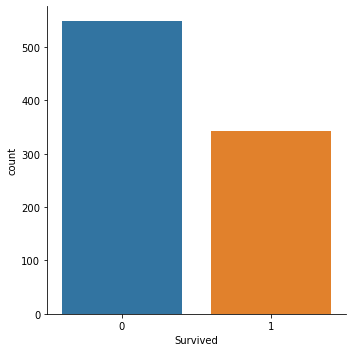

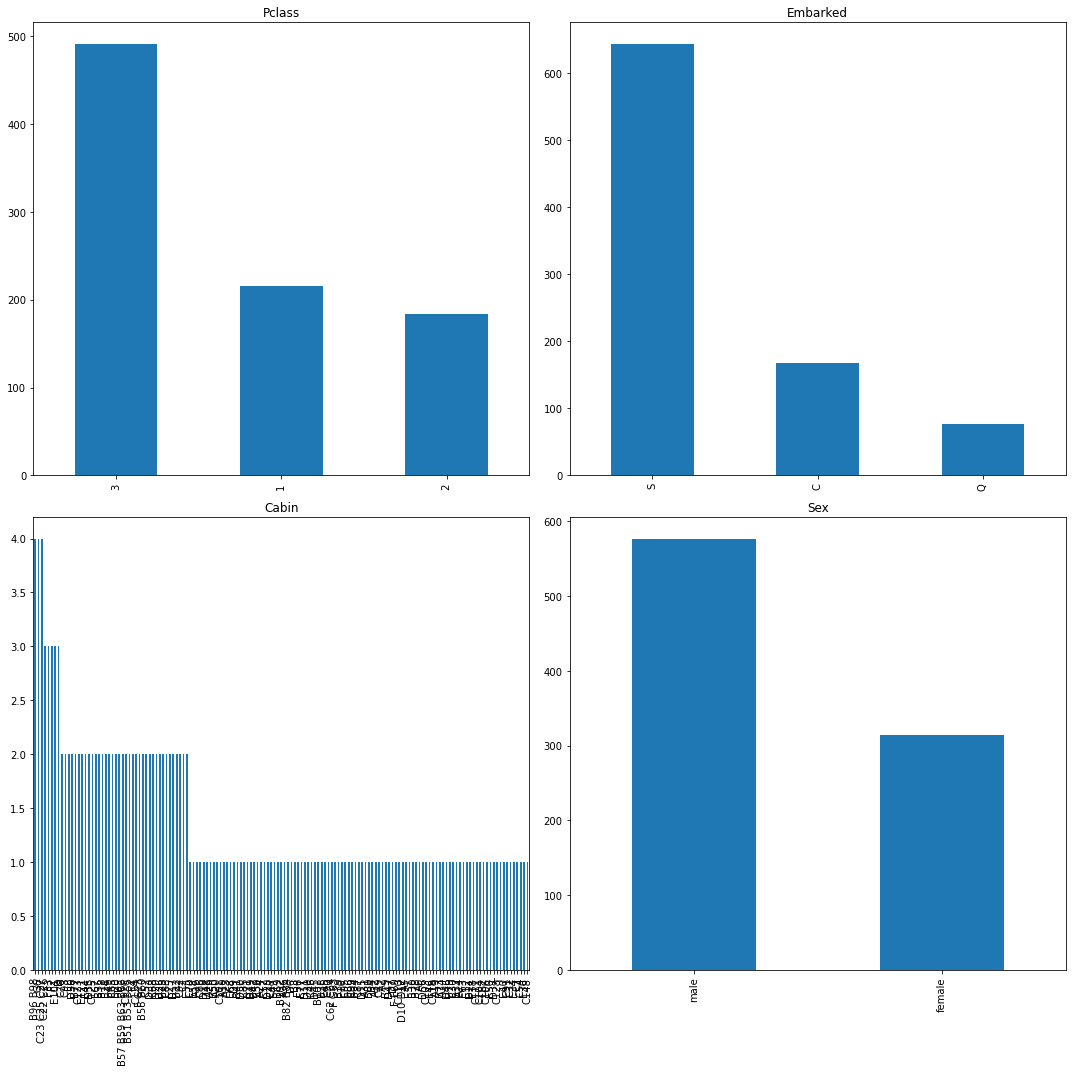

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

indicator_variables = ['Survived']

categorical_variables = ['Pclass', 'Embarked', 'Cabin', 'Sex']

# Numeric Variable Visualizations
titanic_training_data[numeric_variables].describe()

titanic_training_data[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)


# Indicator Variable Visualizations
sns.catplot(x = 'Survived', kind = 'count', data = titanic_training_data)


# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_training_data[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()





### Investigation of Missing Data and Outliers

In [5]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data.isnull().sum()
null_percentage = titanic_training_data.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
Cabin,687,77.104377,object
Age,177,19.865320,float64
Embarked,2,0.224467,object


Let's address the missing data appropriately in a new dataframe that we'll name titanic_training_data_cleaned.

In [6]:
# Create a new dataframe called titanic_training_data_cleaned so we don't modify the originally imported data
titanic_training_data_cleaned = titanic_training_data.copy(deep=True)

# change Null values to the most common value (S) for Embarked 
titanic_training_data_cleaned['Embarked'].fillna('S', inplace=True)

# fill Nulls for Age with median value
titanic_training_data_cleaned['Age'].fillna(titanic_training_data_cleaned['Age'].median(), inplace=True)

# Create new cabin-related variables that will be more useful and cleaner than the original cabin variable
titanic_training_data_cleaned['Cabin_Data_Indicator'] = titanic_training_data_cleaned['Cabin'].notna().astype(int)

titanic_training_data_cleaned['First_Cabin_Deck'] = np.where(titanic_training_data_cleaned['Cabin_Data_Indicator'] == 1,
                                                             titanic_training_data_cleaned['Cabin'].astype(str).str[0],
                                                             'None')

# Create a new variable indicating whether a passenger is a child
titanic_training_data_cleaned['Child_Indicator'] = titanic_training_data_cleaned['Age'] <= 17
titanic_training_data_cleaned['Child_Indicator'] = titanic_training_data_cleaned['Child_Indicator'].astype(int)


# Theoretically we could create a new variable for cabin number here if we're interested in that
# Time permitting, maybe I will circle back to work on that some more, but for now I'm moving on to focus on more
# important pieces of this assignment - especially since intuitively I don't think cabin number should make a huge
# difference for survival rates

# There also could be value in creating a variable about marriage status based on whether the names contain "Miss" or "Mrs"
# But we can circle back to that if we have time I think

# Drop the original Cabin variable since it has so many null values and since some passengers had more than one cabin
# making the original variable difficult to work with
titanic_training_data_cleaned.drop(['Cabin'],axis=1,inplace=True)

In [7]:
titanic_training_data_cleaned['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Check the distributions of the variables in the newly cleaned dataframe.  Also, check for missing values in this new dataframe.

In [9]:
# show first five rows of the data
titanic_training_data_cleaned.head(20)
# show number of columns and rows
titanic_training_data_cleaned.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,None,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,None,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,None,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,None,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,E,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,None,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,None,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,None,1


(891, 14)

#### Variable Key Guide:

| Variable name | Variable label | Variable value and value label | Variable type |
| :-: | :-: | :-: | :-: |
| PassengerID | Passenger ID | | Numerical |
| Survived | Did the passenger survive? | 0 = No, 1 = Yes | Indicator, dichotomous |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical |
| Name | Passenger name | | String |
| Sex | Passenger's sex | Male, Female | Categorical |
| Age | Passenger's age | | Numerical |
| Sibsp | # of siblings / spouses aboard the Titanic | | Numerical | 
| Parch | # of parents / children aboard the Titanic | | Nmerical |
| Ticket | Ticket number | | String |
| Fare | Passenger fare | | Numerical, continuous |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical |
| Cabin Data Indicator | Cabin number | | Indicator, dichotomuous |
| First cabin deck | In first cabin class | | Categorical |
| Child_indicator | Was a child, under 18 years old | | Indicator, dichotomuous |

In [10]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data_cleaned.isnull().sum()
null_percentage = titanic_training_data_cleaned.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data_cleaned.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


,Age,Fare,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.523008,0.381594
std,13.019697,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,35.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

<AxesSubplot:title={'center':'Pclass'}>

<AxesSubplot:title={'center':'Embarked'}>

<AxesSubplot:title={'center':'First_Cabin_Deck'}>

<AxesSubplot:title={'center':'Sex'}>

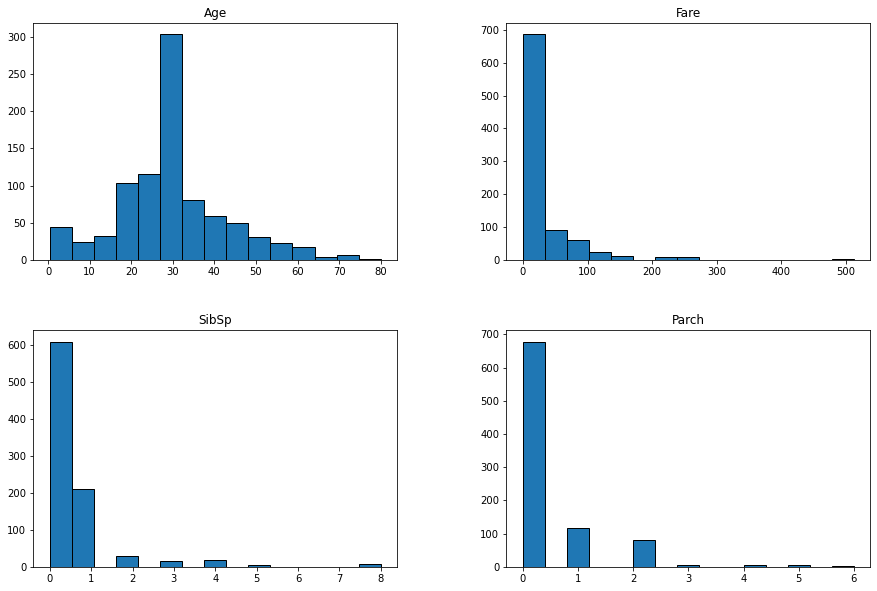

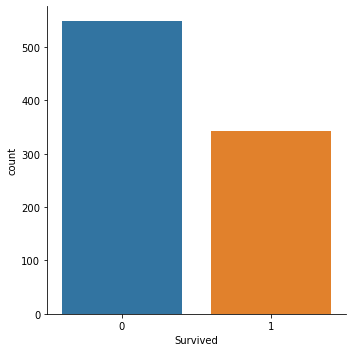

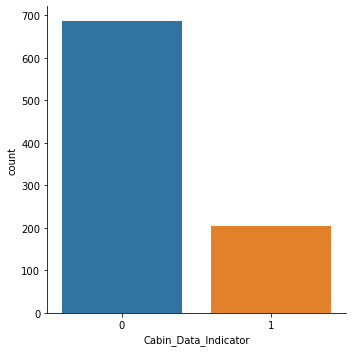

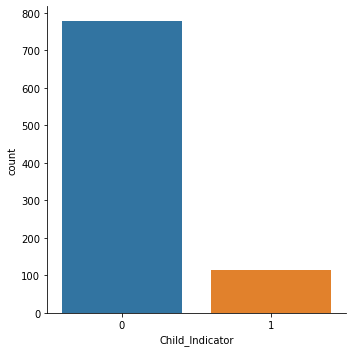

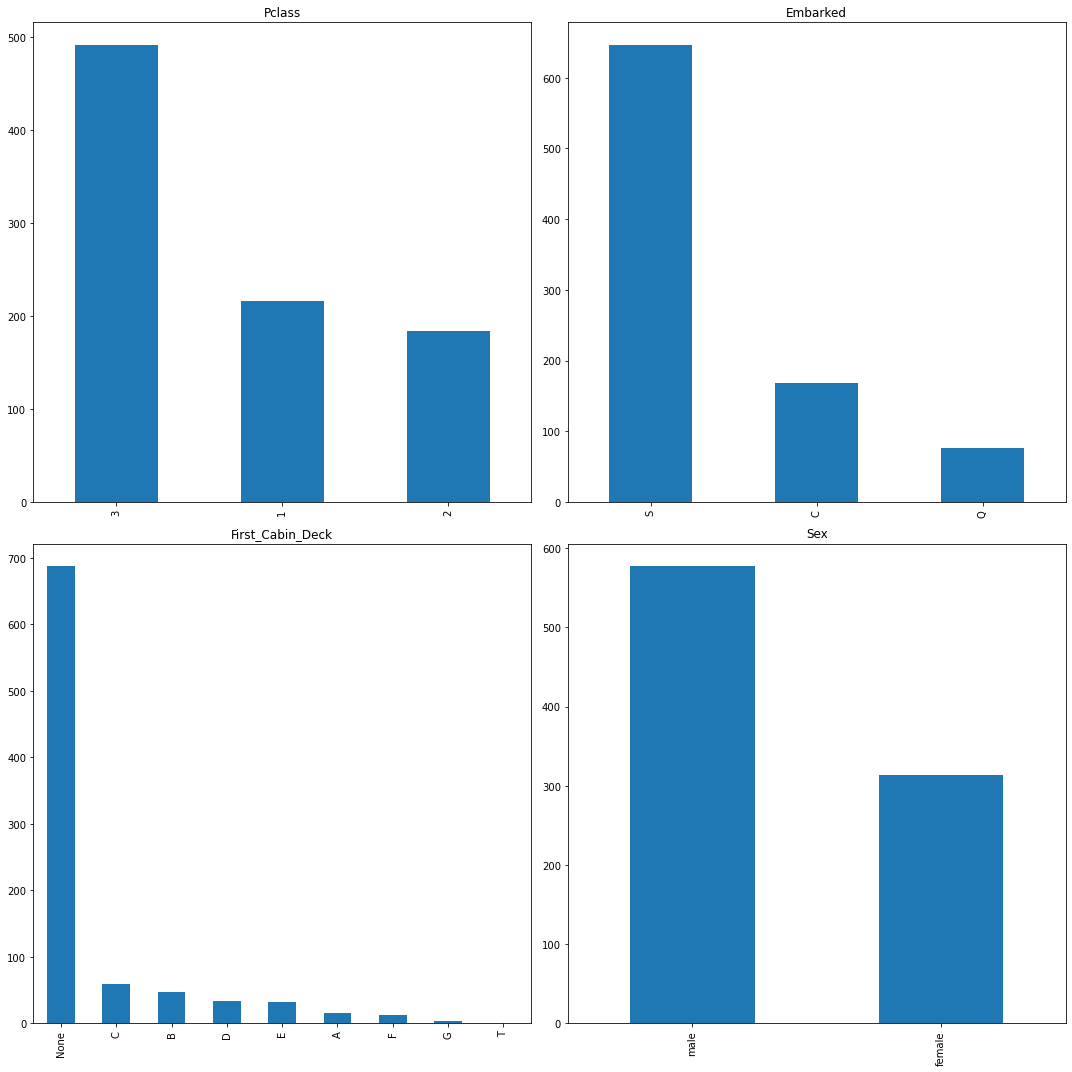

In [11]:
# Update our definitions of the indicator, numeric, and categorical variables to reflect our newly created variables
numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

indicator_variables = ['Survived', 'Cabin_Data_Indicator', 'Child_Indicator']

categorical_variables = ['Pclass', 'Embarked', 'First_Cabin_Deck', 'Sex']

# Numeric Variable Visualizations
titanic_training_data_cleaned[numeric_variables].describe()

titanic_training_data_cleaned[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)

# Indicator Variable Visualizations

for var, subplot in zip(indicator_variables, ax.flatten()):
    sns.catplot(x = var, kind = 'count', data = titanic_training_data_cleaned)

fig.tight_layout()

    
# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_training_data_cleaned[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()


### Examination of the Relationship between the Dependent Variable and Potential Predictors

Let's create some visualizations to examine the relationship between potential predictors and our dependent variable.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

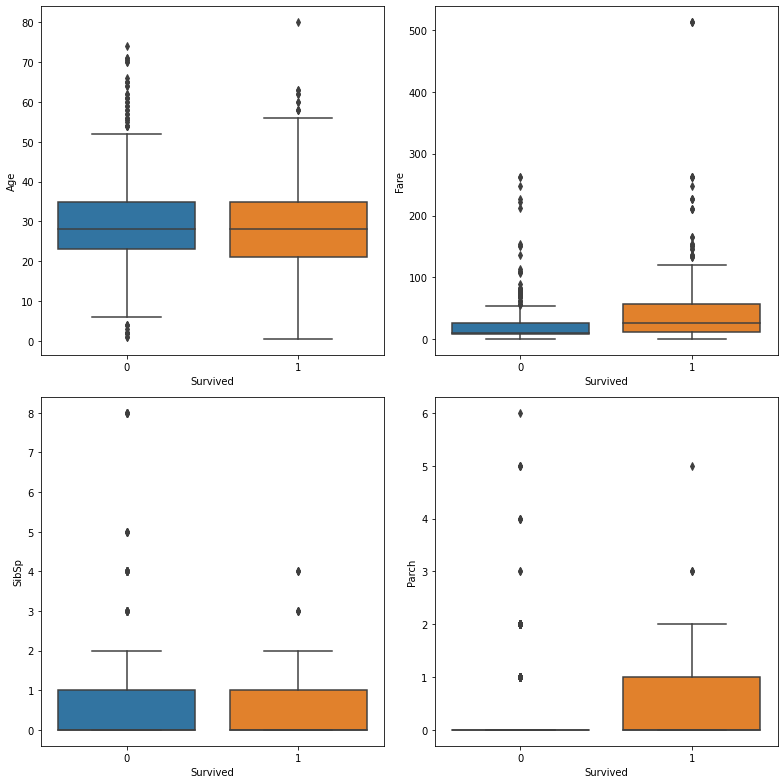

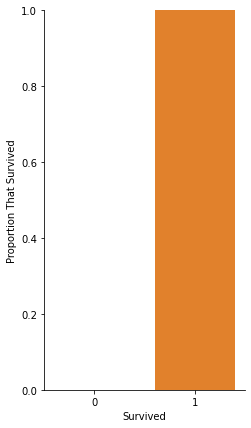

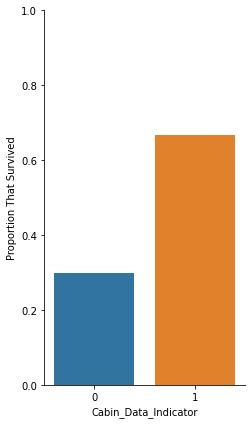

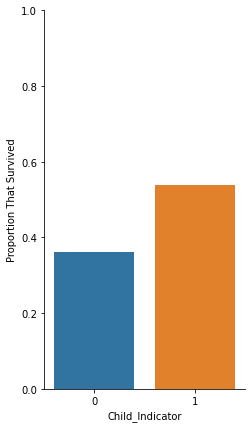

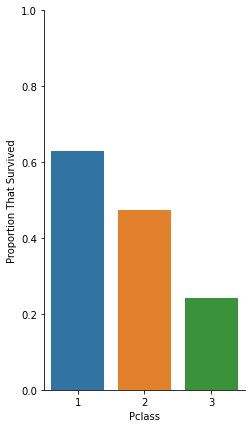

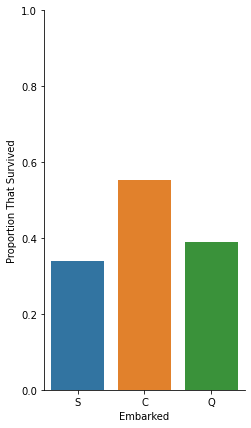

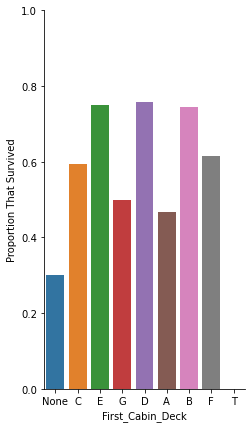

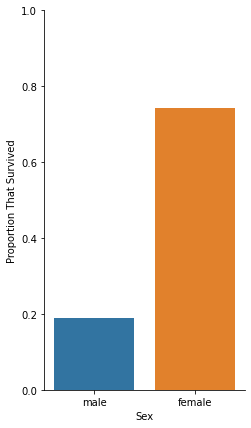

In [12]:
# Numeric Variable Visualizations

fig, ax = plt.subplots(2, 2, figsize=(11, 11))

for var, subplot in zip(numeric_variables, ax.flatten()):
         sns.boxplot(x = 'Survived', y = var, data=titanic_training_data_cleaned, ax=subplot)

fig.tight_layout()

# Indicator Variable Visualizations

for var, subplot in zip(indicator_variables, ax.flatten()):
    g = sns.catplot(
        data = titanic_training_data_cleaned, 
        x = var, 
        y = "Survived",
        kind = "bar",
        height = 6,
        aspect = 0.6,
        ci = None)

    g.set_axis_labels(var, "Proportion That Survived")
    g.set(ylim = (0,1))

fig.tight_layout()



# Categorical Variable Visualizations
for var, subplot in zip(categorical_variables, ax.flatten()):
    g = sns.catplot(
        data = titanic_training_data_cleaned, 
        x = var, 
        y = "Survived",
        kind = "bar",
        height = 6,
        aspect = 0.6,
        ci = None)

    g.set_axis_labels(var, "Proportion That Survived")
    g.set(ylim = (0,1))

fig.tight_layout()




### Random Forest

First, we need to conduct data cleaning exercises that will be needed only for the Random Forest data model.  We will complete these exercises in a copy of the training dataset so that we don't impact other subsequent data anlayses.

In [82]:
# Create a copy of the training dataset
rf_training_validation_df = titanic_training_data_cleaned.copy(deep=True)

# Drop variables from the training dataset that we do not want to be included in the Random Forest model
rf_training_validation_df.drop(['PassengerId', 'Name', 'Ticket', 'First_Cabin_Deck'], axis=1, inplace=True)

# Encode the sex and embarked variables
rf_training_validation_df['Female_Indicator'] = np.where(rf_training_validation_df['Sex'] == 'female', 1, 0)
rf_training_validation_df.drop(['Sex'], axis=1, inplace=True)

rf_training_validation_df['Embarked_C_Indicator'] = np.where(rf_training_validation_df['Embarked'] == 'C', 1, 0)
rf_training_validation_df['Embarked_Q_Indicator'] = np.where(rf_training_validation_df['Embarked'] == 'Q', 1, 0)
rf_training_validation_df.drop(['Embarked'], axis=1, inplace=True)

Next, we will use our training and validation datasets to conduct hyperparameter tuning to find the best hyperparameters for random forest modeling.

In [84]:

# Import Required Modules
#pip install graphviz
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Split the training dataset into predictor and outcome components
rf_train_validation_x = rf_training_validation_df.drop('Survived', axis=1)
rf_train_validation_y = rf_training_validation_df['Survived']

# Split the Kaggle Titanic training data into training and validation components
rf_x_train, rf_x_validation, rf_y_train, rf_y_validation = train_test_split(rf_train_validation_x,
                                                                      rf_train_validation_y, 
                                                                            test_size=0.2, 
                                                                           random_state = 1)

# Conduct hyperparameter tuning for random forest models
param_dist = {'n_estimators': randint(10,500),
              'max_depth': randint(1,20),
             'max_features': randint(1,11),
             'criterion': ("gini", "entropy")}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(rf_x_train, rf_y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022F3A202A90>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022F3A1BB970>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022F37E018B0>})

Best hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 8, 'n_estimators': 438}


Next, we will assess the strength of the random forest model associated with the optimal hyperparameters by applying the model to the validation dataset and observing the resulting confusion matrix, accuracy, precision, and recall.

Accuracy: 0.7877094972067039
Precision: 0.8431372549019608
Recall: 0.589041095890411


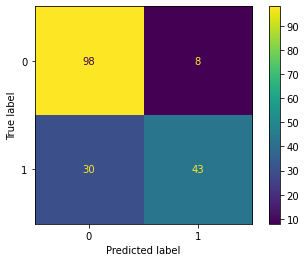

In [85]:

# Generate predictions with the best model
y_validation_predictions_rf = best_rf.predict(rf_x_validation)

# Create the confusion matrix associated with the best random forest model
cm = confusion_matrix(rf_y_validation, y_validation_predictions_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Calculate the accuracy, precision, and recall associated with the predictions of the best random forest model

accuracy_rf_validation = accuracy_score(rf_y_validation, y_validation_predictions_rf)
precision_rf_validation = precision_score(rf_y_validation, y_validation_predictions_rf)
recall_rf_validation = recall_score(rf_y_validation, y_validation_predictions_rf)

print("Accuracy:", accuracy_rf_validation)
print("Precision:", precision_rf_validation)
print("Recall:", recall_rf_validation)


Next, we will visually display the variable importance metrics elicited from the random forest models associated with the optimal hyperparameter values.

<Figure size 864x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Random Forest Model - Feature Importances ')

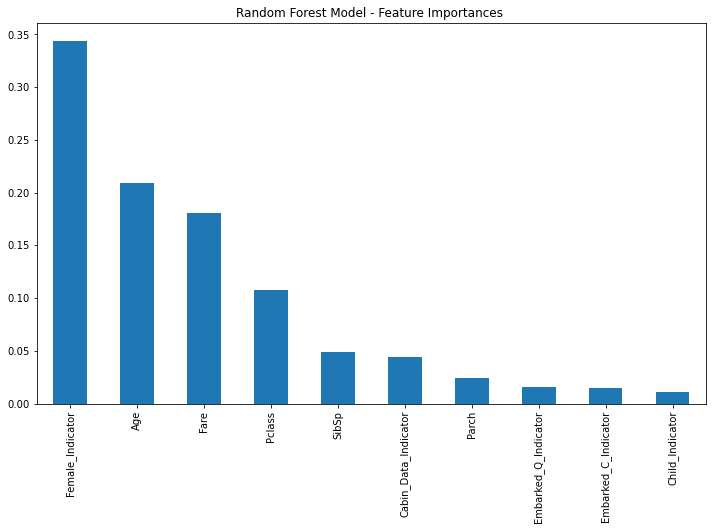

In [86]:

# Plot a bar chart to display variable importances in the random forest models associated with the best hyperparameters
feature_importances_rf_train = pd.Series(best_rf.feature_importances_, index=rf_train_validation_x.columns).sort_values(ascending=False)

plt.figure(figsize=(12,7))

feature_importances_rf_train.plot.bar()

plt.title("Random Forest Model - Feature Importances ")


### Import and Clean Testing Dataset

Import the Titanic Testing Dataset

In [63]:
import pandas as pd
titanic_testing_data = pd.read_csv('test.csv')

# show first five rows of the data
titanic_testing_data.head(100)
# show number of columns and rows
titanic_testing_data.shape

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


(418, 11)

Check the testing dataset for missing values

In [64]:
# find null counts, percentage of null values, and column type
null_count = titanic_testing_data.isnull().sum()
null_percentage = titanic_testing_data.isnull().sum() * 100 / len(titanic_testing_data)
column_type = titanic_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
Cabin,327,78.229665,object
Age,86,20.574163,float64
Fare,1,0.239234,float64


Appropriately address the missing values in the testing dataframe.  Add the newly created variables as well to the testing dataframe.

In [65]:
# Create a new dataframe called titanic_training_data_cleaned so we don't modify the originally imported data
titanic_testing_data_cleaned = titanic_testing_data.copy(deep=True)

# change Null for Fare with the median value from the Training dataset
titanic_testing_data_cleaned['Fare'].fillna(titanic_training_data_cleaned['Fare'].median(), inplace=True)

# fill Nulls for Age with median value from the Training dataset
titanic_testing_data_cleaned['Age'].fillna(titanic_training_data_cleaned['Age'].median(), inplace=True)

# Create new cabin-related variables that will be more useful and cleaner than the original cabin variable
titanic_testing_data_cleaned['Cabin_Data_Indicator'] = titanic_testing_data_cleaned['Cabin'].notna().astype(int)

titanic_testing_data_cleaned['First_Cabin_Deck'] = np.where(titanic_testing_data_cleaned['Cabin_Data_Indicator'] == 1,
                                                             titanic_testing_data_cleaned['Cabin'].astype(str).str[0],
                                                             'None')

# Create a new variable indicating whether a passenger is a child
titanic_testing_data_cleaned['Child_Indicator'] = titanic_testing_data_cleaned['Age'] <= 17
titanic_testing_data_cleaned['Child_Indicator'] = titanic_testing_data_cleaned['Child_Indicator'].astype(int)

# Drop the original Cabin variable since it has so many null values and since some passengers had more than one cabin
# making the original variable difficult to work with
titanic_testing_data_cleaned.drop(['Cabin'],axis=1,inplace=True)



Examine whether the desired modifications to the testing dataframe applied correctly.

In [66]:
# show first five rows of the data
titanic_training_data_cleaned.head(20)
# show number of columns and rows
titanic_training_data_cleaned.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,None,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,None,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,None,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,None,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,E,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,None,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,None,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,None,1


(891, 14)

In [67]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data_cleaned.isnull().sum()
null_percentage = titanic_training_data_cleaned.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data_cleaned.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


Conduct exploratory data analysis on the variables in the testing dataframe to confirm that all the values appear to be reasonable (to proactively address data value errors if needed).

,Age,Fare,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000
mean,29.805024,35.576535,0.447368,0.392344
std,12.667969,55.850103,0.896760,0.981429
min,0.170000,0.000000,0.000000,0.000000
25%,23.000000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,35.750000,31.471875,1.000000,0.000000
max,76.000000,512.329200,8.000000,9.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

<AxesSubplot:title={'center':'Pclass'}>

<AxesSubplot:title={'center':'Embarked'}>

<AxesSubplot:title={'center':'First_Cabin_Deck'}>

<AxesSubplot:title={'center':'Sex'}>

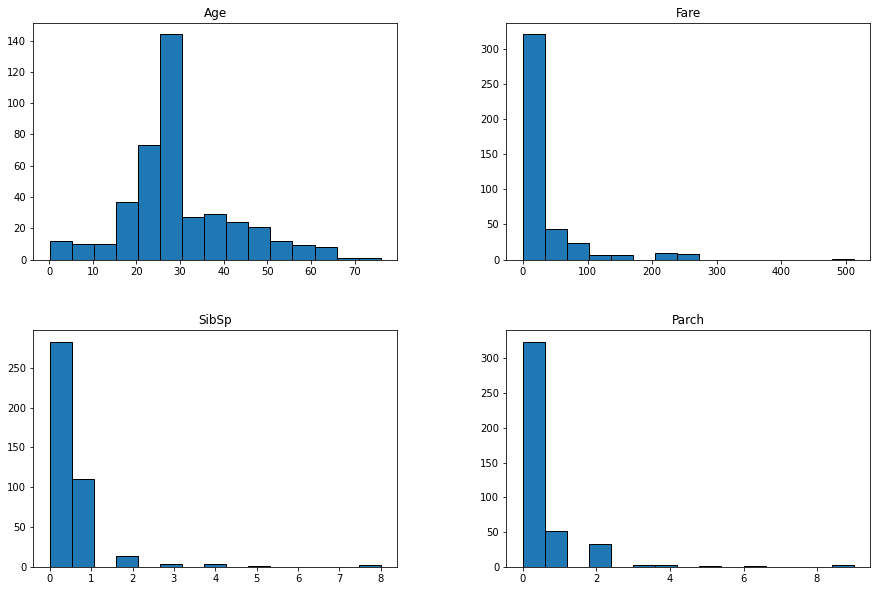

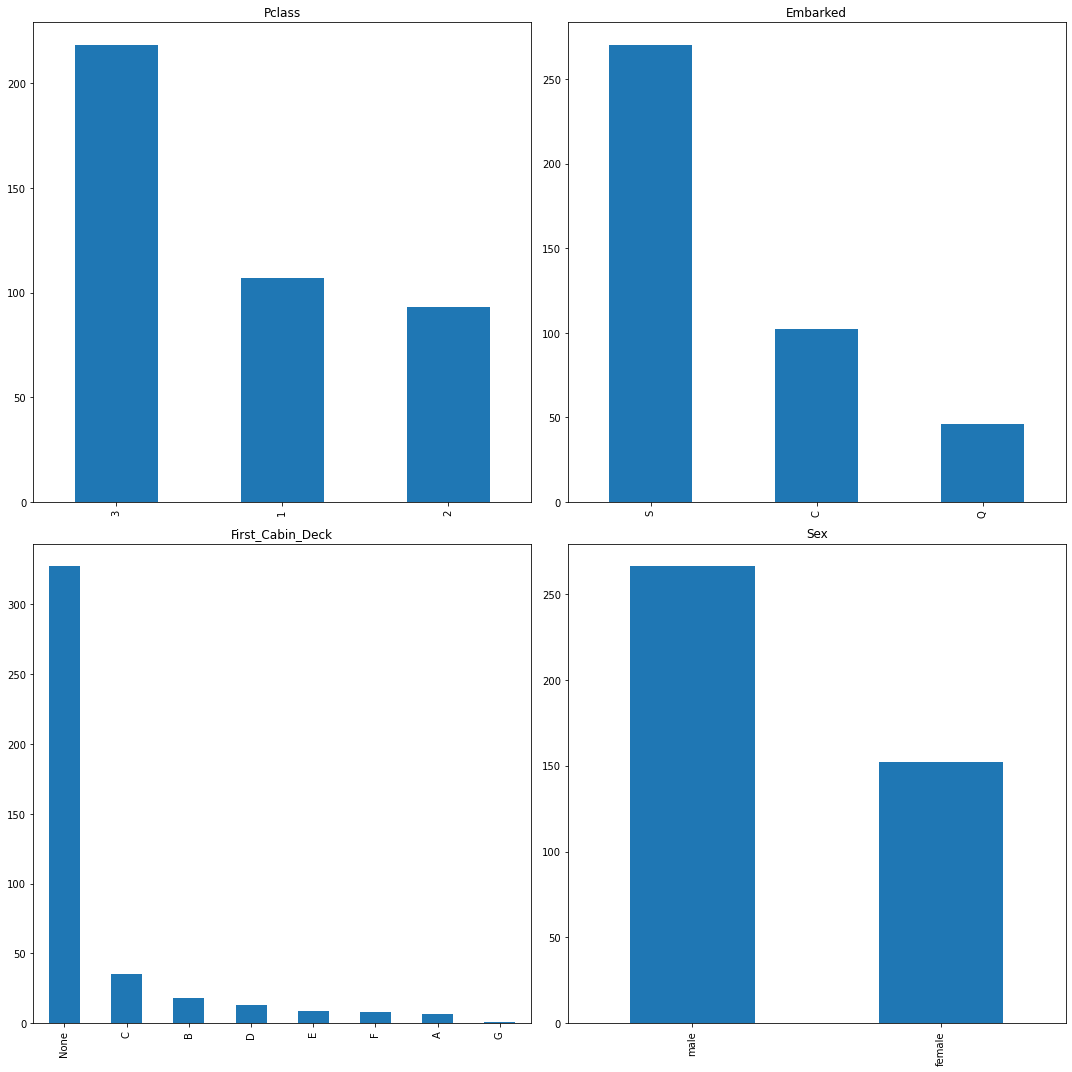

In [68]:
# Numeric Variable Visualizations
titanic_testing_data_cleaned[numeric_variables].describe()

titanic_testing_data_cleaned[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)


    
# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_testing_data_cleaned[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()

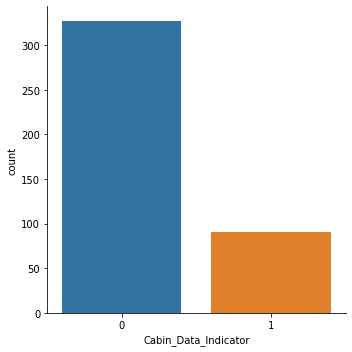

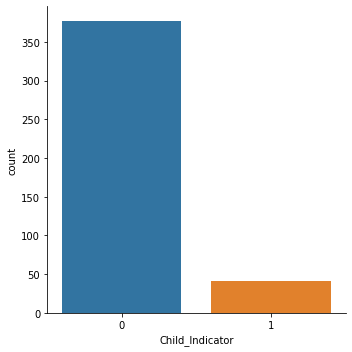

In [44]:
# Indicator Variable Visualizations
indicator_predictors = ['Cabin_Data_Indicator', 'Child_Indicator']


for var, subplot in zip(indicator_predictors, ax.flatten()):
    sns.catplot(x = var, kind = 'count', data = titanic_testing_data_cleaned)

fig.tight_layout()

### Apply Random Forest Model to Test Data

Conduct data cleaning exercises that are specific to the Random Forest Model

In [87]:
# Create a copy of the testing dataset
rf_testing_df = titanic_testing_data_cleaned.copy(deep=True)

# Drop variables from the training dataset that we do not want to be included in the Random Forest model
rf_testing_df.drop(['Name', 'Ticket', 'First_Cabin_Deck'], axis=1, inplace=True)

# Encode the sex and embarked variables
rf_testing_df['Female_Indicator'] = np.where(rf_testing_df['Sex'] == 'female', 1, 0)
rf_testing_df.drop(['Sex'], axis=1, inplace=True)

rf_testing_df['Embarked_C_Indicator'] = np.where(rf_testing_df['Embarked'] == 'C', 1, 0)
rf_testing_df['Embarked_Q_Indicator'] = np.where(rf_testing_df['Embarked'] == 'Q', 1, 0)
rf_testing_df.drop(['Embarked'], axis=1, inplace=True)


Apply the Random Forest Model to the Test Dataframe

In [88]:
# Create a dataframe for predictor variables in the test dataframe for random forest model
rf_testing_x = rf_testing_df.drop(columns=['PassengerId'])

# Apply the Random Forest model to the test dataset
y_test_predictions_rf = best_rf.predict(rf_testing_x)

# Put the random forest predictions into a Pandas dataframe
prediction_df_rf = pd.DataFrame(y_test_predictions_rf, columns=['Survived'])

# Add the PassengerId column to the front of the random forest predictions dataframe
prediction_df_rf.insert(0, 'PassengerId', rf_testing_df['PassengerId'])

#output predictions to csv
prediction_df_rf.to_csv('test_predictions_random_forest_v1.csv', index=False)


Display the Kaggle Results from the Random Forest Model

In [ ]:
# Display the kaggle results associated with the KNN Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Titanic_Random_Forest_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### Encode Embarked, Sex, and First Cabin Deck in Test Dataset

In [45]:
# Encode Embarked, Sex, and First Cabin Deck
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Embarked
le.fit(np.array(titanic_testing_data_cleaned['Embarked']).reshape(-1,1))
titanic_testing_data_cleaned['encoded_Embarked'] = le.transform(titanic_testing_data_cleaned['Embarked'])

# Cabin Deck
le.fit(np.array(titanic_testing_data_cleaned['First_Cabin_Deck']).reshape(-1,1))
titanic_testing_data_cleaned['encoded_FirstCabinDeck'] = le.transform(titanic_testing_data_cleaned['First_Cabin_Deck'])

# Sex
le.fit(np.array(titanic_testing_data_cleaned['Sex']).reshape(-1,1))
titanic_testing_data_cleaned['encoded_Sex'] = le.transform(titanic_testing_data_cleaned['Sex'])


test_classification_model_data = titanic_testing_data_cleaned.drop(                                                            
                                                               columns=['Sex','PassengerId','Name','Ticket',
                                                                        'Embarked','First_Cabin_Deck',
                                                                        'Age', 'SibSp', 'Fare', 'encoded_FirstCabinDeck',
                                                                        'Parch', 'Cabin_Data_Indicator'
                                                                       ])
test_classification_model_data.head(10)

C:\Users\cmark\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LabelEncoder()

LabelEncoder()

LabelEncoder()

,Pclass,Child_Indicator,encoded_Embarked,encoded_Sex
0,3,0,1,1
1,3,0,2,0
2,2,0,1,1
3,3,0,2,1
4,3,0,2,0
5,3,1,2,1
6,3,0,1,0
7,2,0,2,1
8,3,0,0,0
9,3,0,2,1


#### Encode Categorical Variables (Embarked)

In [46]:
cat_vars=['encoded_Embarked']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(test_classification_model_data[var], prefix=var)
    test_classification_model_data=test_classification_model_data.join(cat_list)

data_vars=test_classification_model_data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

test_data_final=test_classification_model_data[to_keep]
test_data_final.columns.values


test_classification_model_data = test_classification_model_data.drop(                                                            
                                                               columns=['encoded_Embarked_0', 'encoded_Embarked'
                                                                       ])

# show dataframe with encoded categorical variables
test_classification_model_data.head(10)

array(['Pclass', 'Child_Indicator', 'encoded_Sex', 'encoded_Embarked_0',
       'encoded_Embarked_1', 'encoded_Embarked_2'], dtype=object)

,Pclass,Child_Indicator,encoded_Sex,encoded_Embarked_1,encoded_Embarked_2
0,3,0,1,1,0
1,3,0,0,0,1
2,2,0,1,1,0
3,3,0,1,0,1
4,3,0,0,0,1
5,3,1,1,0,1
6,3,0,0,1,0
7,2,0,1,0,1
8,3,0,0,0,0
9,3,0,1,0,1
